In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data.dataset import ModelNet40, collate_fn
import os
import numpy as np

from utils import *
from model3 import Encoder
from torch.utils.data import DataLoader, Subset
import torch
from evaluate import *
from train import train

In [3]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
device

'cuda'

### Getting the dataset path

In [4]:
os.chdir('..')
modelnet40_path = os.path.join(os.getcwd(), 'ModelNet40')
os.chdir('TransformersFor3dPointCLouds')
print(modelnet40_path)

/scratch/users/ahamadeh18/COMP390/ModelNet40


### Initalizing the training set DataLoader object

In [5]:
SAMPLE_SIZE = 256
TEST = False
SAMPLING_METHOD = 'fps'
batch_size = 10

In [6]:
dataset = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

In [7]:
class_ind_dist = dataset.class_indicies_distribution()

In [8]:
overfit_classes_num = 4
OVERFITTING_SAMPLE_SIZE = 10
overfitting_set = []
# overfitting_set = torch.randperm(len(dataset))[:30].tolist()
# print(overfitting_set)
for i in range(overfit_classes_num):
    overfitting_set += class_ind_dist[i][:OVERFITTING_SAMPLE_SIZE]

In [9]:
overfitting_subset = Subset(dataset, overfitting_set)
overfitting_loader = DataLoader(overfitting_subset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

## Overfitting the model

In [9]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

# class_weights =  torch.tensor(dataset.class_weights).float()
# criterion = CrossEntropyLoss(weight=class_weights)
criterion = CrossEntropyLoss()

# Trying the new model:

In [11]:
input_dims = 3
embed_dim = 256
out_dims = 8
num_layers = 6
num_heads = 1
num_classes = 40
dropout = 0.0

In [12]:
model = Encoder(input_size=SAMPLE_SIZE, input_dims=input_dims, embed_dim=embed_dim, 
                out_dims=out_dims, num_layers=num_layers, num_heads=num_heads,
                num_classes=num_classes, dropout=dropout)

In [13]:
torch.autograd.set_detect_anomaly(True)

In [14]:
from torch.optim import SGD, Adam
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR

parameters = model.parameters()
learning_rate = 1e-4
weight_decay = 1e-1
momentum = 0.9

# optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)
optimizer = Adam(parameters, lr=learning_rate, amsgrad=True)
epochs = 20
# step = len(dataset)
# scheduler = CosineAnnealingLR(optimizer, step)
scheduler = StepLR(optimizer=optimizer, step_size=epochs // 4, gamma=0.8)

In [15]:
# scheduler = None
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=overfitting_loader,
          criterion=criterion, epochs=epochs, verbose=False)

100%|██████████| 4/4 [00:22<00:00,  5.70s/it]


epoch: 0 | loss: 11.237439751625061
Epoch time: 22.815608024597168


100%|██████████| 4/4 [00:13<00:00,  3.39s/it]


epoch: 1 | loss: 6.854628145694733
Epoch time: 13.551179647445679


100%|██████████| 4/4 [00:13<00:00,  3.40s/it]


epoch: 2 | loss: 5.007630884647369
Epoch time: 13.621806621551514


100%|██████████| 4/4 [00:13<00:00,  3.48s/it]


epoch: 3 | loss: 4.83168226480484
Epoch time: 13.912803173065186


100%|██████████| 4/4 [00:13<00:00,  3.40s/it]


epoch: 4 | loss: 1.7193366289138794
Epoch time: 13.60151195526123


100%|██████████| 4/4 [00:13<00:00,  3.36s/it]


epoch: 5 | loss: 3.4946757555007935
Epoch time: 13.4259614944458


100%|██████████| 4/4 [00:13<00:00,  3.36s/it]


epoch: 6 | loss: 2.3331241756677628
Epoch time: 13.460626125335693


100%|██████████| 4/4 [00:13<00:00,  3.34s/it]


epoch: 7 | loss: 2.967472016811371
Epoch time: 13.371336460113525


100%|██████████| 4/4 [00:13<00:00,  3.34s/it]


epoch: 8 | loss: 1.0369397103786469
Epoch time: 13.367673873901367


100%|██████████| 4/4 [00:13<00:00,  3.31s/it]


epoch: 9 | loss: 1.359598308801651
Epoch time: 13.252751111984253


100%|██████████| 4/4 [00:13<00:00,  3.35s/it]


epoch: 10 | loss: 0.20031534135341644
Epoch time: 13.391286134719849


100%|██████████| 4/4 [00:13<00:00,  3.34s/it]


epoch: 11 | loss: 0.7006135970586911
Epoch time: 13.348002195358276


100%|██████████| 4/4 [00:13<00:00,  3.37s/it]


epoch: 12 | loss: 0.02615960198454559
Epoch time: 13.4698486328125


100%|██████████| 4/4 [00:13<00:00,  3.39s/it]


epoch: 13 | loss: 0.031037640990689397
Epoch time: 13.573632955551147


100%|██████████| 4/4 [00:13<00:00,  3.38s/it]


epoch: 14 | loss: 0.008697920507984236
Epoch time: 13.516157865524292


100%|██████████| 4/4 [00:13<00:00,  3.38s/it]


epoch: 15 | loss: 0.007635055459104478
Epoch time: 13.517062187194824


100%|██████████| 4/4 [00:13<00:00,  3.37s/it]


epoch: 16 | loss: 0.008424028375884518
Epoch time: 13.488368272781372


100%|██████████| 4/4 [00:13<00:00,  3.43s/it]


epoch: 17 | loss: 0.005474494450027123
Epoch time: 13.717102766036987


100%|██████████| 4/4 [00:13<00:00,  3.38s/it]


epoch: 18 | loss: 0.0031243949488271028
Epoch time: 13.531246900558472


100%|██████████| 4/4 [00:13<00:00,  3.37s/it]

epoch: 19 | loss: 0.001939417328685522
Epoch time: 13.496321678161621
Final loss 0.001939417328685522


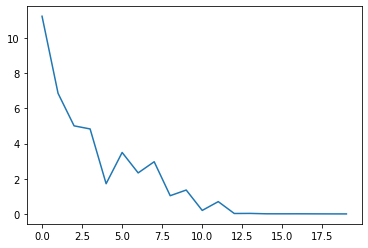

In [16]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [17]:
accuracy = eval_2(model, overfitting_loader)

100%|██████████| 4/4 [00:13<00:00,  3.43s/it]


In [18]:
print(f'{accuracy}%') 

95.0%


# End of trying the new model

# Start training the actual model

### Defining the dataset and splitting it:

In [7]:
SAMPLE_SIZE = 256
TEST = False
SAMPLING_METHOD = 'fps'
batch_size = 128

In [8]:
train_dataset = ModelNet40(dataset_path=modelnet40_path, test=False, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)
test_dataset = ModelNet40(dataset_path=modelnet40_path, test=True, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

In [9]:
train_portion = 0.9

N = len(train_dataset)

n_train = int(N * 0.9)
n_validation = N - n_train

In [13]:
train_set, validation_set = torch.utils.data.random_split(train_dataset, [n_train , n_validation])

train_loader = DataLoader(dataset=train_set, batch_size=batch_size, collate_fn=collate_fn)
validation_loader = DataLoader(dataset=validation_set, batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=collate_fn)

### Creating the model:

In [14]:
input_dims = 3
embed_dim = 256
out_dims = 8
num_layers = 6
num_heads = 1
num_classes = 40
dropout = 0.5

In [15]:
model = Encoder(input_size=SAMPLE_SIZE, input_dims=input_dims, embed_dim=embed_dim, 
                out_dims=out_dims, num_layers=num_layers, num_heads=num_heads,
                num_classes=num_classes, dropout=dropout)

### Optimizer:

In [16]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-4
momentum = 0.9
weight_decay = 1e-4

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

# step = len(train_dataset)
# scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [17]:
from torch.nn import CrossEntropyLoss

class_weights =  torch.tensor(train_dataset.class_weights).float().to(device=device)
criterion = CrossEntropyLoss(weight=class_weights).to(device=device)

In [18]:
epochs = 10
scheduler = None
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=train_loader,
          criterion=criterion, epochs=epochs, verbose=False)

  7%|▋         | 5/70 [03:43<48:22, 44.66s/it]


KeyboardInterrupt: 

### Plotting the loss:

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [ ]:
accuracy = eval_2(model, overfitting_loader)

In [ ]:
print(f'{accuracy}%')

In [ ]:
x = dataset[0][0].view(1, 128, 3)
yhat = model(x.float())
yhat

In [19]:
softmax = torch.nn.Softmax()(yhat)
softmax

/kuacc/apps/anaconda/5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<SoftmaxBackward0>)

In [20]:
torch.argmax(softmax)

tensor(0)

### Creating the model

In [9]:
in_features = 3
feature_dim = 128
out_features = 1024
decoder_features = 256
k_size = 4
NUM_CLASSES = 40

In [10]:
model = PointCloudClassifier(in_features, feature_dim, out_features, decoder_features, k_size, NUM_CLASSES)

### Dataset

In [23]:
SAMPLE_SIZE = 128
TEST = False
SAMPLING_METHOD = 'fps'

model_net40 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

### Optimizer:

In [11]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-3
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(model_net40)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [12]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

class_weights =  torch.tensor(model_net40.class_weights).float()
criterion = CrossEntropyLoss(weight=class_weights)
# criterion = NLLLoss()

In [27]:
overfitting_data = []
for i in range(20):
    overfitting_data.append(model_net40[i])
overfitting_loader = DataLoader(overfitting_data)

## Overfitting the model

In [30]:
from train import train
epochs = 15
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=overfitting_loader,
          criterion=criterion, epochs=epochs, verbose=False)

  0%|          | 0/20 [00:00<?, ?it/s]


RuntimeError: t() expects a tensor with <= 2 dimensions, but self is 3D

### Plotting the loss:

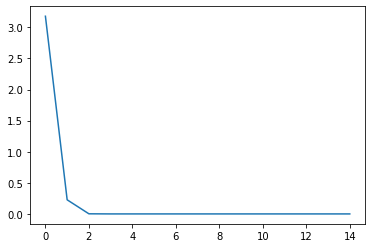

In [28]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [30]:
x_test = model(model_net40[0][0].float())
(torch.argmax(x_test) == model_net40[0][1]).item()

True

In [31]:
x_test

tensor([46.0388, -0.1911, -1.2720, -0.5212, -1.1767, -1.7760, -1.1018, -1.4636,
        -0.6017, -0.4255, -1.2653, -1.4788, -0.7948, -1.6204, -1.0603, -1.0340,
        -1.2143, -0.8255, -1.5459, -1.4086,  0.1541, -1.1079, -1.7431, -0.3271,
        -1.8796, -1.3339, -1.5646, -0.3407, -1.3065, -0.4129, -1.1565, -0.8027,
        -0.9239, -1.6641, -1.1740, -1.9464, -1.5179, -0.6686, -1.0703, -1.2988],
       grad_fn=<AddBackward0>)

In [39]:
print(torch.nn.Softmax(dim=0)(x_test))

tensor([1.0000e+00, 8.3673e-21, 2.8389e-21, 6.0151e-21, 3.1229e-21, 1.7150e-21,
        3.3658e-21, 2.3441e-21, 5.5498e-21, 6.6193e-21, 2.8580e-21, 2.3086e-21,
        4.5752e-21, 2.0039e-21, 3.5083e-21, 3.6019e-21, 3.0076e-21, 4.4369e-21,
        2.1588e-21, 2.4764e-21, 1.1818e-20, 3.3454e-21, 1.7724e-21, 7.3036e-21,
        1.5462e-21, 2.6687e-21, 2.1187e-21, 7.2045e-21, 2.7427e-21, 6.7033e-21,
        3.1866e-21, 4.5392e-21, 4.0209e-21, 1.9182e-21, 3.1314e-21, 1.4463e-21,
        2.2201e-21, 5.1906e-21, 3.4735e-21, 2.7640e-21],
       grad_fn=<SoftmaxBackward0>)


## Training the model

In [40]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

### DataLoader

In [41]:
batch_size = 128

In [42]:
batch_size = 32

In [43]:
from torch.utils.data import DataLoader

train_loader = DataLoader(model_net40, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

### Optimizer:

In [44]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-4
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(model_net40)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [53]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

class_weights = torch.tensor(model_net40.class_weights).float()
criterion = CrossEntropyLoss(weight=class_weights)

In [ ]:
epochs = 10
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=train_loader,
          criterion=criterion, epochs=epochs, save_params=True, verbose=False, load_model=False)

100%|██████████| 77/77 [27:27<00:00, 21.39s/it]


epoch: 0 | loss: 290.16918444633484
Epoch time: 1647.4102654457092


100%|██████████| 77/77 [27:25<00:00, 21.37s/it]


epoch: 1 | loss: 290.5951235294342
Epoch time: 1645.5314455032349


100%|██████████| 77/77 [27:26<00:00, 21.38s/it]


epoch: 2 | loss: 290.51247549057007
Epoch time: 1646.2706401348114


100%|██████████| 77/77 [27:26<00:00, 21.38s/it]


epoch: 3 | loss: 289.8480145931244
Epoch time: 1646.2923140525818


 34%|███▍      | 26/77 [09:14<16:21, 19.24s/it]

## Model Evaluation:

### Loading the test set:

In [ ]:
SAMPLE_SIZE = 128
TEST = True
SAMPLING_METHOD = 'fps'
batch_size = 1

model_net_256_test = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)
test_laoder = DataLoader(model_net_256_test, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

In [ ]:
evaluate(model, model_net_256_test, epochs, verbose=True)

In [ ]:
evaluate(model, model_net_256_test, epochs, verbose=True)

In [121]:
data, label, _ = model_net_256_test[0]

In [122]:
yhat = model(data.float())
print(label)
print((torch.argmax(yhat) == label).item())

In [123]:
accuracy = 0
N = len(model_net_256_test)
model.eval()
for point in model_net_256_test:
    if point == None:
        N -= 1
        continue
    x, y, _ = point
    yhat = model(x.float())
    
    if (torch.argmax(yhat) == y).item():
        accuracy += 1

In [124]:
acc = accuracy / N

In [125]:
acc